# House pricing Assignment

### Introduction:
- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

### Problem statement:
- You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Steps:
- Data understanding and exploration
    - Initial report using sweetviz before doing any data changes
- Data cleaning
    - Imputation of missing values
    - Drop unwanted columns
    - Handle the formate
    - Adjust datatype
- After clean up: Data understanding and exploration
    - Univariate analysis after imputation
        - univariate analysis of numerical variables
        - univariate analysis of categorical variables
    - Bivariate analysis
        - Heatmap
        - SalePrice vs numeric variables - pairplot
        - SalePrice vs categorical variable
- Data preparation
    - Ordinal encoding and Dummy encoding 
- Model building and evaluation
    - Linear regression with unregularised
    - Regularisation: Linear regression with Ridge regression
    - Regularisation: Linear regression with Lasso regression
- Compare linear regression without regularization and other regularized methods: Ridge and Lasso
    
    

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OrdinalEncoder


In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [4]:
### set display options for pandas
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',100)

## Data understanding and exploration

In [5]:
# Read the data set
data = pd.read_csv("train.csv")

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data.shape

(1460, 81)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
#Check for duplicate rows
data_copy = data.copy()

In [11]:
data_copy.drop_duplicates()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [12]:
data_copy.equals(data)
# no duplicate rows

True

#### Initial report using sweetviz before doing any data changes.

In [13]:
# using sweetviz 
!pip install sweetviz

In [14]:
## Initial report using sweetviz because doing any data changes.
import sweetviz as sv
sweetviz_report = sv.analyze(data,pairwise_analysis="off")
sweetviz_report.show_html('sweetviz_report_initial.html')
#attached the report in git

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report_initial.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


_Initial Summary_
- Total features provided 81, and 54 are Categorical and 26 are Numerical.
- 1460 rows presents in the data set.
- Target 'SalePrice' is target feature.
- MSzoning: Most of the data is from 'RL' zone
- LandContour: Most sold houses are having flatness 'Lvl'
- Neighborhood: Top 5 Real estate rating areas are Names>CollgCr>OldTown>Edwards>Somerst>Gilbert
- BldgType & HouseStype: 'Single-family Detached' houses are most commonly soled houses with 1Story and 2Story housestyle.
- OverallQual/OverallCond: Overall quality of the houses sold are btw 5 & 6
- YearBuilt: 2005-2006 built houses have good demand.
- YrSold: Total houses sold in each year follows up and down trend with most houses sold in 2009 and least in 2010
- MoSold: Realestate is more in the months of June>July>May which is usual end of Autumn and beginning of Winter

#### Identify Missing values and imputing them
- Option-1: Check why they are null. If the feature is not present, impute with 'NA'
- Option-2: Impute with statistical metric by check common entities.

In [15]:
data.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

#####  Imputation of missing values

In [16]:
# PoolQC:
data[data.PoolArea == 0 & data.PoolQC.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [17]:
# All the missing values of 'PoolQC' is because there is 'No Pool'. Update the null values with NA
data.loc[(data.PoolArea == 0) & (data.PoolQC.isnull()), 'PoolQC'] = 'NA'

In [18]:
## FireplaceQu : 
data[(data.Fireplaces == 0) & (data.FireplaceQu.isnull())]

## All the missing values of 'FireplaceQu' is because there is no 'fireplaces'. Update the null values with NA
data.loc[(data.Fireplaces == 0) & (data.FireplaceQu.isnull()), 'FireplaceQu'] = 'NA'

In [19]:
## GarageCond,GarageType,GarageFinish,GarageQual         
data[data.GarageCond.isnull() & (data.GarageArea ==0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NA,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NA,NaN,NaN,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NA,NaN,NaN,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,NA,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NA,NaN,NaN,0,8,2007,WD,Normal,123600
99,100,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,NA,NaN,Shed,400,1,2010,WD,Normal,128950
108,109,50,RM,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,793,GasW,TA,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,NA,NaN,NaN,0,8,2007,WD,Normal,115000
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,NA,NaN,NaN,0,6,2006,WD,Normal,84500
127,128,45,RM,55.0,4388,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,LwQ,116,Unf,0,556,672,GasA,Ex,Y,SBrkr,840,0,0,840,0,0,1,0,3,1,TA,5,Typ,1,TA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NA,NaN,NaN,0,6,2007,WD,Normal,87000
140,141,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,432,Unf,0,432,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,1,Po,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NA,NaN,N

In [20]:
## All the missing values of 'GarageCond','GarageType','GarageFinish,'GarageQual' is because there is no Garage. Update the null values with NA
data.loc[data.GarageCond.isnull() & (data.GarageArea ==0), 'GarageCond'] = 'NA'
data.loc[data.GarageType.isnull() & (data.GarageArea ==0), 'GarageType'] = 'NA'
data.loc[data.GarageFinish.isnull() & (data.GarageArea ==0), 'GarageFinish'] = 'NA'
data.loc[data.GarageQual.isnull() & (data.GarageArea ==0), 'GarageQual'] = 'NA'

# GarageYrBlt is updated with 'NA'
data.loc[data.GarageYrBlt.isnull(),'GarageYrBlt'] = 0

In [21]:
# 'MiscFeature' null value is replaced with 'NA'
data.loc[data.MiscFeature.isnull(), 'MiscFeature'] = 'NA'

In [22]:
# 'Alley' & 'Fence' null value is replaced with 'NA'
data.loc[data.Alley.isnull(), 'Alley'] = 'NA'
data.loc[data.Fence.isnull(), 'Fence'] = 'NA'

In [23]:
#'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1'

print(data[(data.TotalBsmtSF == 0) & (data.BsmtFinType2.isnull())])

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
17      18          90       RL         72.0    10791   Pave    NA      Reg   
39      40          90       RL         65.0     6040   Pave    NA      Reg   
90      91          20       RL         60.0     7200   Pave    NA      Reg   
102    103          90       RL         64.0     7018   Pave    NA      Reg   
156    157          20       RL         60.0     7200   Pave    NA      Reg   
182    183          20       RL         60.0     9060   Pave    NA      Reg   
259    260          20       RM         70.0    12702   Pave    NA      Reg   
342    343          90       RL          NaN     8544   Pave    NA      Reg   
362    363          85       RL         64.0     7301   Pave    NA      Reg   
371    372          50       RL         80.0    17120   Pave    NA      Reg   
392    393          20       RL          NaN     8339   Pave    NA      IR1   
520    521         190       RL         60.0    1080

In [24]:
## All the missing values of 'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1' is because there is no bsmt. Update the null values with NA

data.loc[data.BsmtFinType2.isnull() & (data.TotalBsmtSF ==0), 'BsmtFinType2'] = 'NA'
data.loc[data.BsmtExposure.isnull() & (data.TotalBsmtSF ==0), 'BsmtExposure'] = 'NA'
data.loc[data.BsmtQual.isnull() & (data.TotalBsmtSF ==0), 'BsmtQual'] = 'NA'
data.loc[data.BsmtCond.isnull() & (data.TotalBsmtSF ==0), 'BsmtCond'] = 'NA'
data.loc[data.BsmtFinType1.isnull() & (data.TotalBsmtSF ==0), 'BsmtFinType1'] = 'NA'




In [25]:
data[data.BsmtExposure.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NA,NA,NA,0,2,2006,WD,Normal,192500


In [26]:
#update last missing BsmtExposure value with the mode of similar ExterCond & ExterQual of the record
data[(data.ExterCond == 'TA') & (data.ExterQual == 'Gd')].BsmtExposure.mode()

0    No
Name: BsmtExposure, dtype: object

In [27]:
data.loc[data.BsmtExposure.isnull(),'BsmtExposure'] = 'No'

In [28]:

data[data.BsmtFinType2.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,10,2009,WD,Normal,284000


In [29]:
data[data.BsmtFinType2 == 'GLQ'].BsmtFinType2.mode()

0    GLQ
Name: BsmtFinType2, dtype: object

In [30]:
#update last missing BsmtFinType2 value with the mode of BsmtFinType1 record
data.loc[data.BsmtFinType2.isnull(),'BsmtFinType2'] = 'GLQ'

In [31]:
# MasVnrType,MasVnrArea
print(data.MasVnrType.value_counts())
print('\n')
print(data.MasVnrArea.value_counts(normalize=True))

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


0.0      0.592975
180.0    0.005510
72.0     0.005510
108.0    0.005510
120.0    0.004821
           ...   
562.0    0.000689
89.0     0.000689
921.0    0.000689
762.0    0.000689
119.0    0.000689
Name: MasVnrArea, Length: 327, dtype: float64


In [32]:
# since 60% percent of the houses has no Masonry veneer, updating null MasVnrType = none and null MasVnrArea = 0.0

data.loc[data.MasVnrType.isnull(),'MasVnrType'] = 'None'
data.loc[data.MasVnrArea.isnull(),'MasVnrArea'] = 0.0

In [33]:
#Electrical
data[data.Electrical.isnull()]
#YearBuilt = 2006. Based on this, lets check what are the Electrical systems used by other houses build during 2006

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NA,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,5,2008,WD,Normal,167500


In [34]:
data.loc[data.YearBuilt == 2006,'Electrical'].value_counts()

SBrkr    66
Name: Electrical, dtype: int64

In [35]:
# Since all the houses built in 2006(follow the same construction rules) used 'SBrkr', missing value is updated with the same
data.loc[data.Electrical.isnull(),'Electrical'] = 'SBrkr'

In [36]:
# Missing LotFrontage is updated with mean
data.loc[data.LotFrontage.isnull(),'LotFrontage'] = data.LotFrontage.mean()

In [37]:
### Verify still missing values
data.isnull().sum().sort_values(ascending = False)

Id               0
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
Electrical       0
HeatingQC        0
MSSubClass       0
Heating          0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities   

#### Drop unwanted columns

In [38]:
# Drop Id 
data = data.drop('Id',axis=1)

#### Handle formate

In [39]:
#changing the formate of GarageYrBlt from eg 1980.0 to 1980
data['GarageYrBlt'] = data['GarageYrBlt'].apply(lambda x:int(str(x).split('.')[0]))


In [40]:
data['GarageYrBlt'].head()

0    2003
1    1976
2    2001
3    1998
4    2000
Name: GarageYrBlt, dtype: int64

#### Adjust datatype

In [41]:
# Convert MSSubClass as category
data['MSSubClass'] = data.MSSubClass.astype('object')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [43]:
num_cols = data.select_dtypes(['int64','float64']).columns.to_list()
print(num_cols)
print('\n')
print(f'Number of numeric columns: {len(num_cols)}')

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Number of numeric columns: 36


In [44]:
cat_cols = data.select_dtypes(['object']).columns.to_list()
print(cat_cols)
print('\n')
print(f'Number of categorical columns: {len(cat_cols)}')

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Number of categorical columns: 44


#### Univariate analysis after imputation

##### - univariate analysis of numerical variables

In [45]:

def plot_num(df,cols):
    ax = plt.figure(figsize=(20,165))
    i=1
    for col in cols:
        
        ax = plt.subplot(40,4,i)
        sns.boxplot(df[col],color='g')
        plt.xticks(rotation = 0,fontsize=8)
        plt.xlabel(col,fontsize=10)
        i += 1
        
    plt.show()

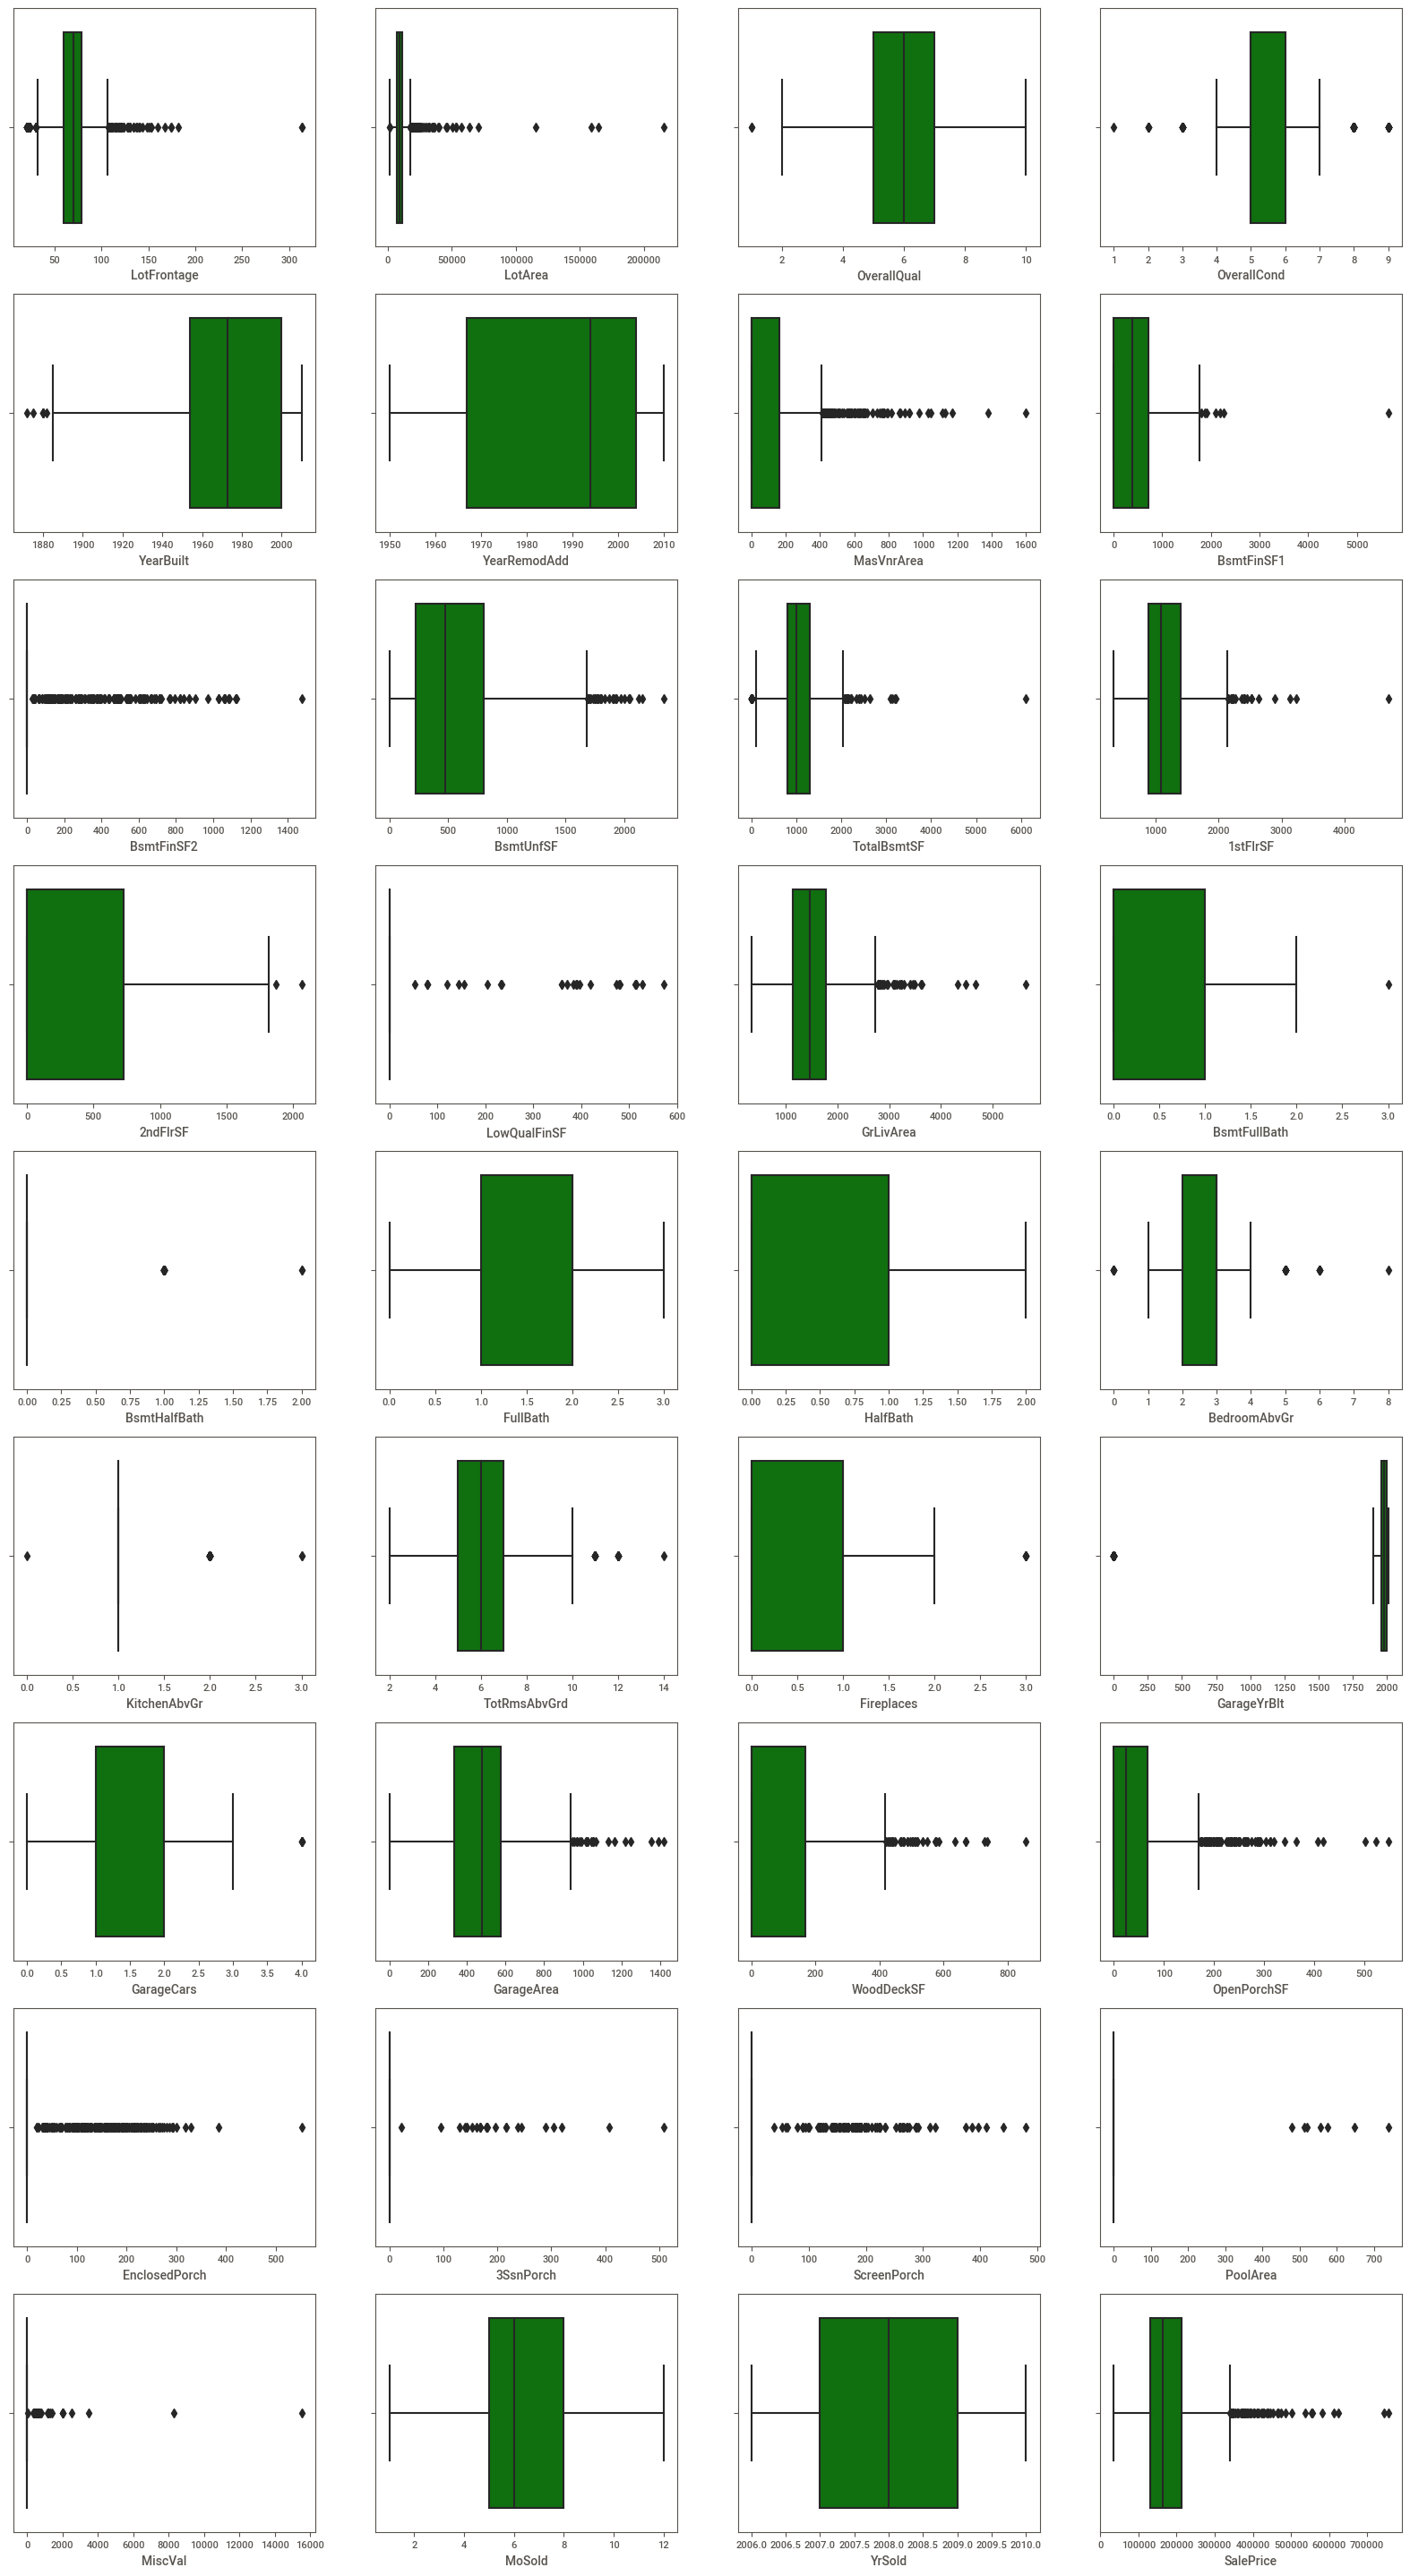

In [46]:
plot_num(data,num_cols)

##### - univariate analysis of Categorical variables

In [47]:
## count plot for categorical variables
def plot_cat(df,cols):
    i=1
    ax = plt.figure(figsize=(20,200))
    for col in cols:
        ax = plt.subplot(50,5,i)
        sns.countplot(df[col])
        plt.xticks(rotation = 90,fontsize = 9)
        i += 1
        

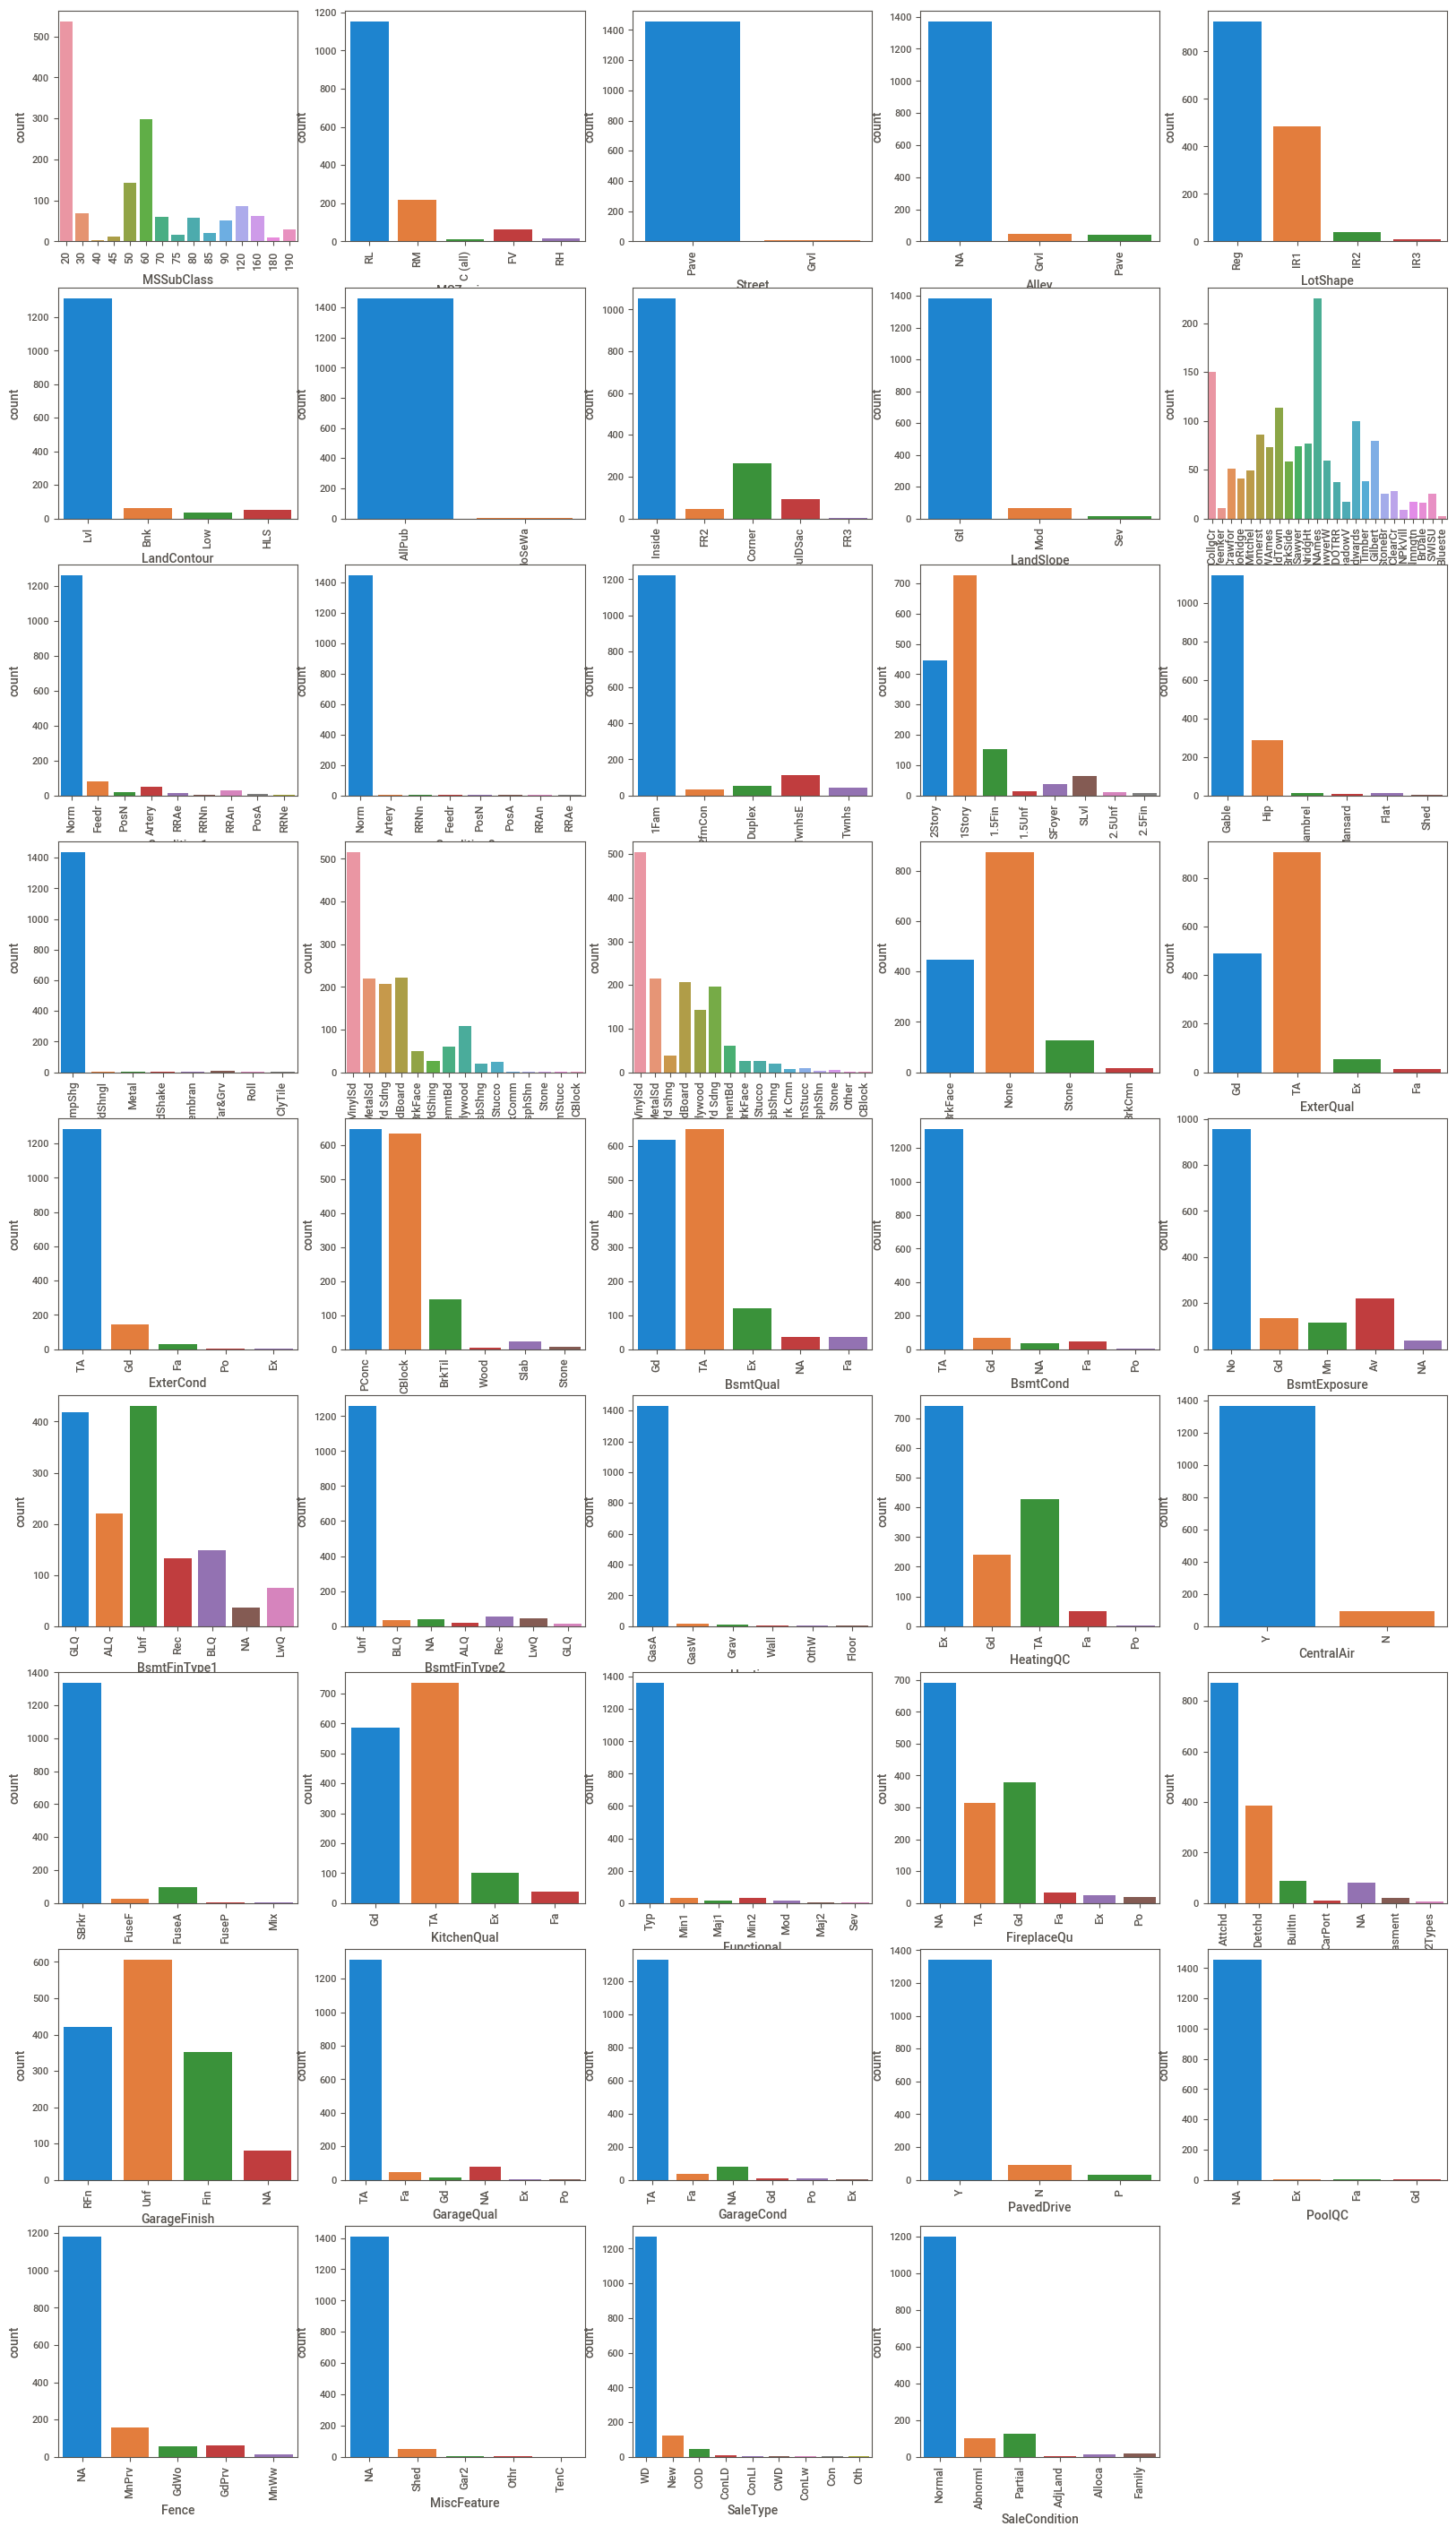

In [48]:
plot_cat(data,cat_cols)

##### Summary after imputation:
- After imputation, there is no change on the shape or distribution of the imputed columns. So, it is safe to continue.
- There are outliers in some of the columns like LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,TotatlBsmtSF,1stFlrSF,WoodDeckSF,OpenPorchSF,GarageArea,SalePrice
- Summary provided from sweetviz report still holds good and valid after imputation.

#### Bivariate analysis

<AxesSubplot:>

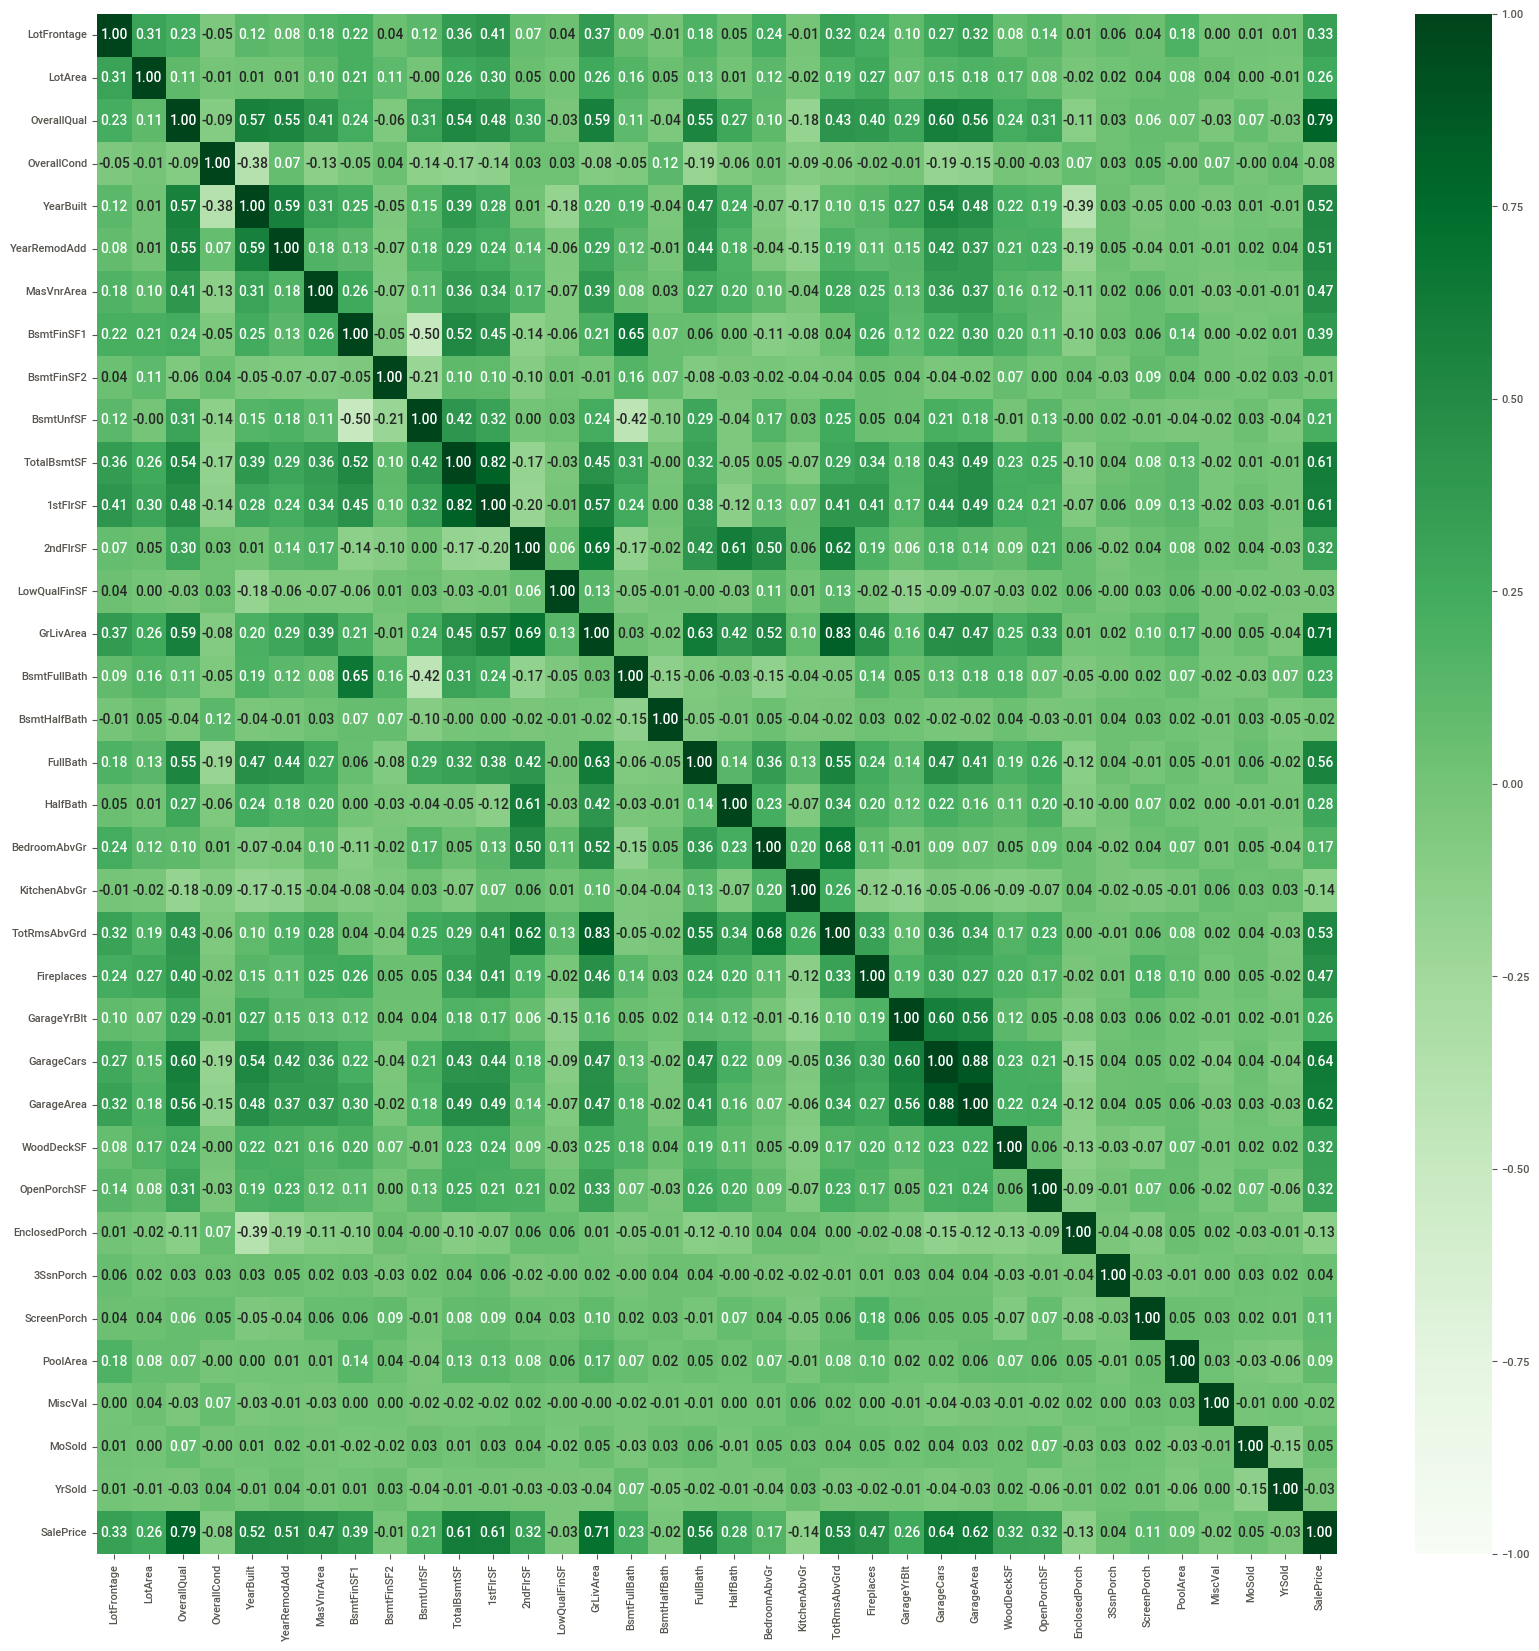

In [49]:
## Plot headmap for numeric columns
plt.figure(figsize=(20,20))
sns.heatmap(data[num_cols].corr(),cmap ='Greens',annot=True,fmt= '.2f', vmin= -1, vmax= 1)

- There are some strong correlation with our target variable as well as between the independent variables.
- With saleprice, we have TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea with strong correlation above 0.5
- Hightest correlation observed btw TotRmsAbvGrd and GrLivArea with 0.83. Next btw TotaBsmtSF and 1stFlrSF



In [50]:
## Find the top feature which have high corelation with 'SalePrice'
top_corr_cols = data[num_cols].corr().nlargest(11,columns='SalePrice')['SalePrice'].index

<AxesSubplot:>

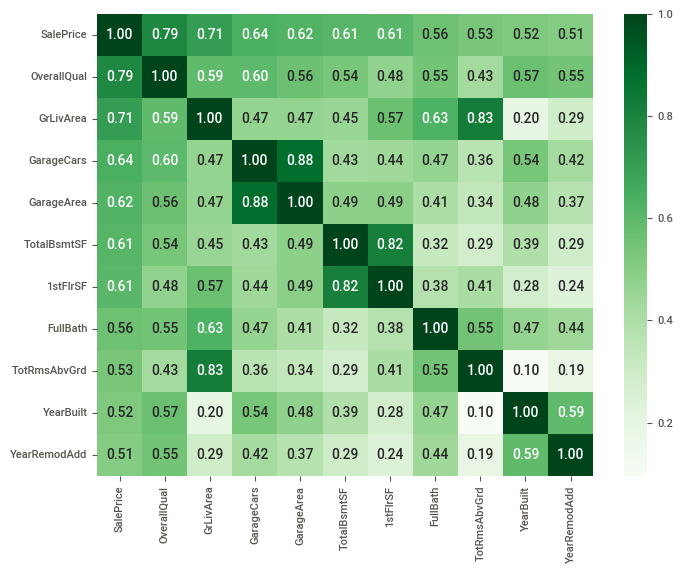

In [51]:
plt.figure(figsize=(8,6))
sns.heatmap(data[top_corr_cols].corr(),annot=True,cmap='Greens',fmt='.2f')

<Figure size 1000x1000 with 0 Axes>

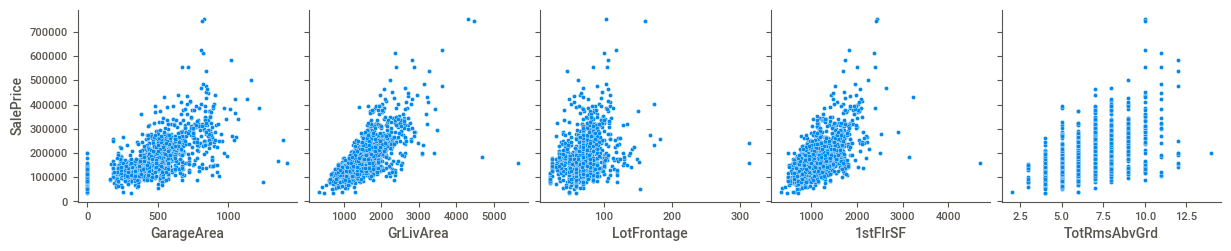

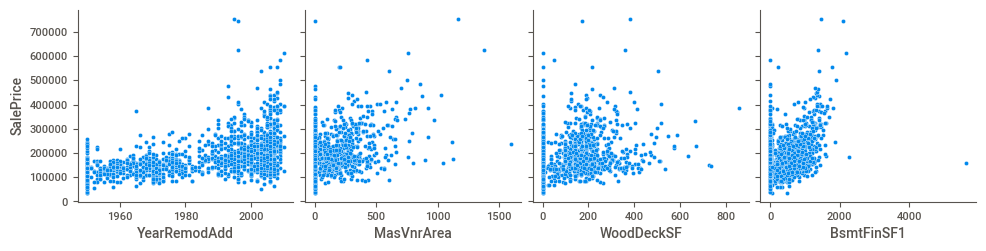

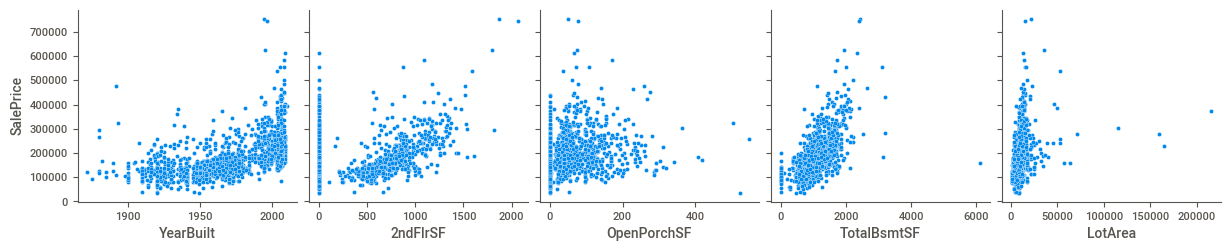

In [52]:
plt.figure(figsize=(10,10))
plt.suptitle("pair plot among numeric columsn")
sns.pairplot(data,x_vars=['GarageArea','GrLivArea','LotFrontage','1stFlrSF','TotRmsAbvGrd'], y_vars='SalePrice')
sns.pairplot(data,x_vars=['YearRemodAdd','MasVnrArea','WoodDeckSF','BsmtFinSF1'], y_vars='SalePrice')
sns.pairplot(data,x_vars=['YearBuilt','2ndFlrSF','OpenPorchSF','TotalBsmtSF','LotArea'], y_vars='SalePrice')
plt.show()


#### Summary from heatmap between top 10 high correlated columns with saleprice

- From common sense point of view, all the top 10 properties here have much obvious nature which will effect the SalesPrice. This is also proven with the data as well.

Order:
'OverallQual' > 'GrLivArea' > 'GarageCars' >  'GarageArea' >
'TotalBsmtSF' > '1stFlrSF' > 'FullBath' > 'TotRmsAbvGrd' >
'YearBuilt' >       'YearRemodAdd'

In [53]:
#### plot saleprice vs cat_cols

cat_cols = ['MSSubClass','MSZoning','LotConfig','Neighborhood','BldgType','HouseStyle'
           ,'RoofStyle','RoofMatl','GarageType']

In [54]:
#plot saleprice vs cat_cols
def plot_sales_cat(df,cols):
    for col in cols:
        plt.figure(figsize=(6,5))
        sns.boxplot(x=col,y='SalePrice',data=df)
        plt.xticks(rotation = 90,fontsize=10)
        plt.show()

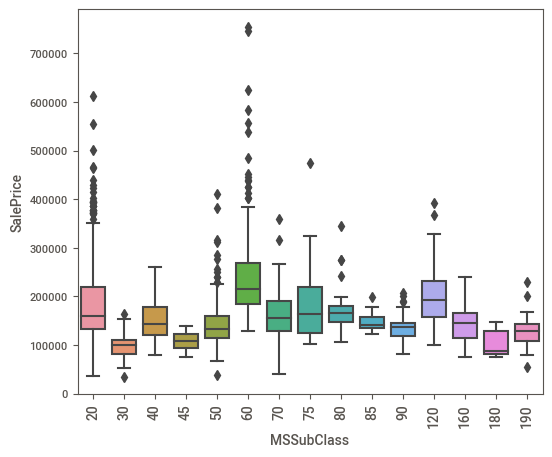

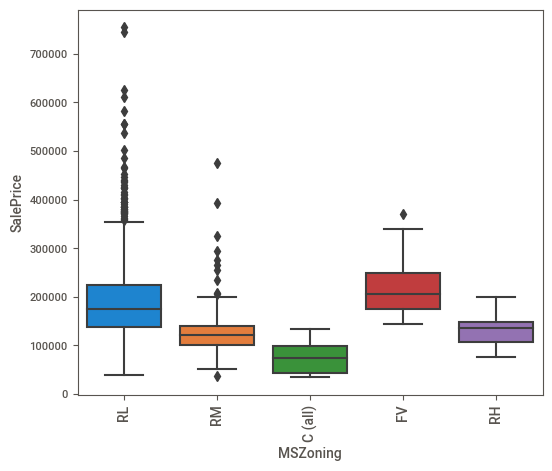

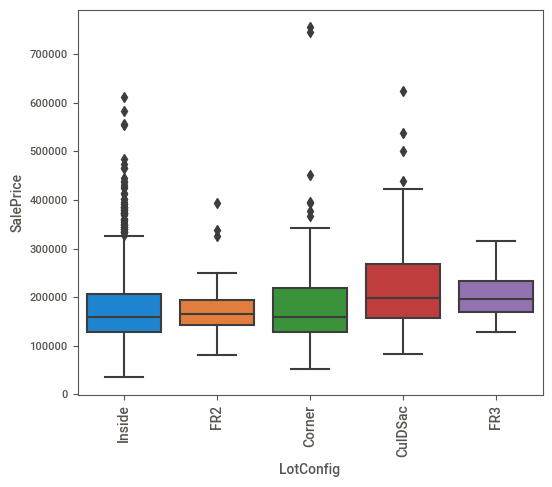

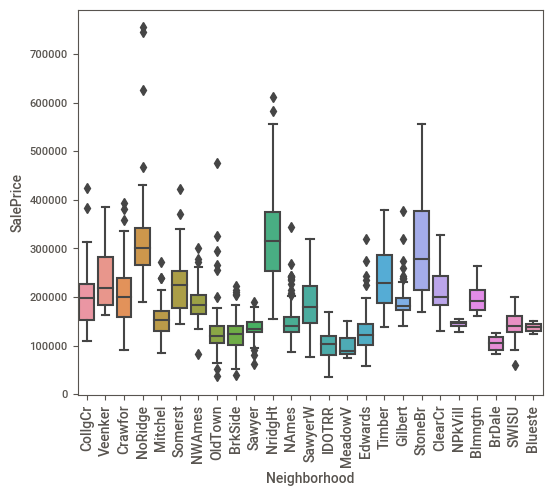

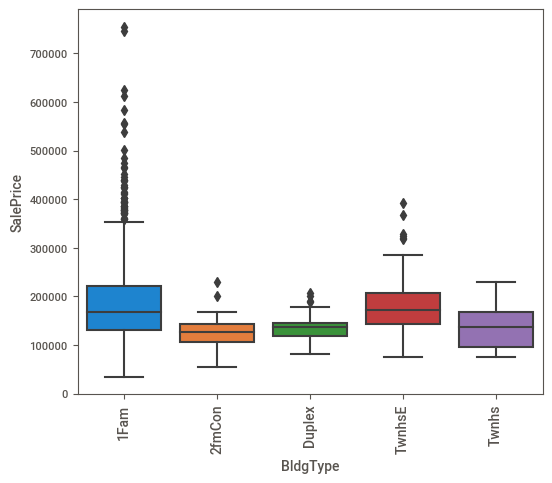

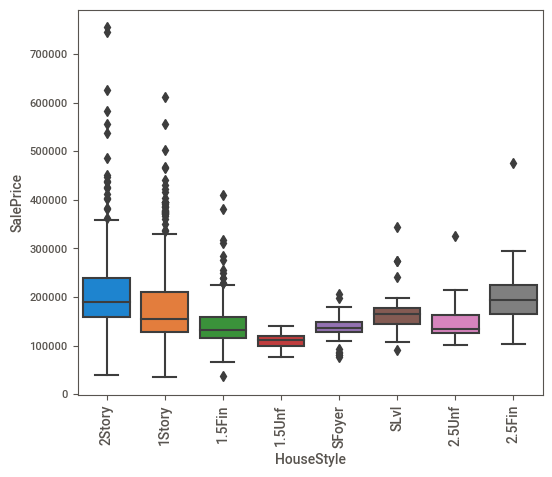

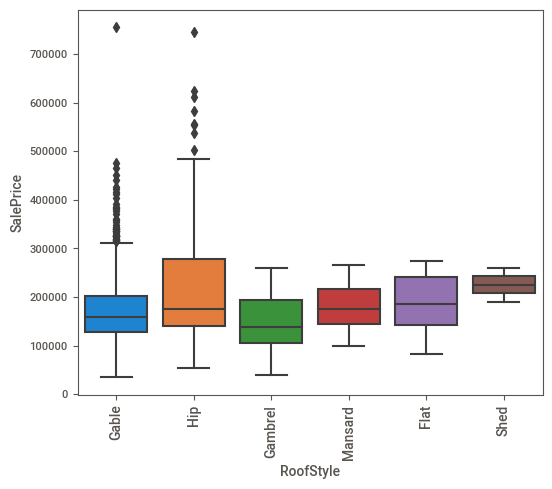

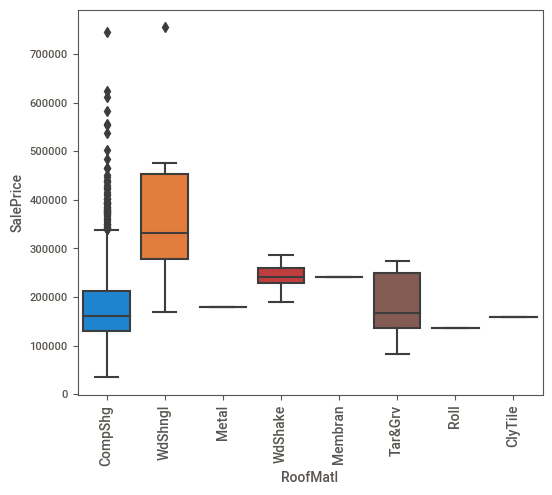

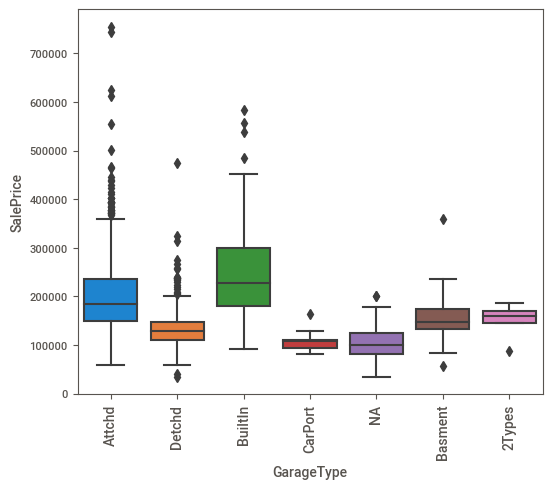

In [55]:
plot_sales_cat(data,cat_cols)

#### Summary for Categorical columns with SalePrice
- MSSubClass with **'60'** has hightest saleprice.
- Housing from **'RL'** MSzone cost more.
- Lotconfig with **'CulDSac'** have higher saleprice.
- Neighborhood - **'NridgHt'** and **'NoRidge'** usually have expensive houses.
- BldgType with **'1Fam'** and HouseStyle with 2Story have high demand and usually have high SalePrice
- Houses RoofStyle with **'Hip'** and 'RoofMatl' with **'WdShngl'** are more expensive houses.
- Garages which are **Builtin** or **Attached** are more expensive.

## Data preparation

####  Ordinal encoding and Dummy encoding 

Among the categorical columns, there are some columns which represents Ordinal nature, so inorder to preserve the ranking,
Ordinal encoding is done.

_Ordinal columns_-
- ExterQual
- ExterCond
- BsmtQual
- BsmtCond
- BsmtExposure
- HeatingQC
- KitchenQual
- FireplaceQu
- GarageQual
- GarageCond
- PoolQC


_Note_: OverallQual, OverallCond represent categorical columns but they are already encoded Ordinal. So, they are not considered and left as continous variable from the start.



On rest of the columns, Dummy encoding is done.

_Dummy encoding columns_
- MSSubClass
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- Foundation
- BsmtFinType1
- BsmtFinType2
- Heating
- CentralAir
- Electrical
- Functional
- GarageType
- GarageFinish
- PavedDrive
- Fence
- MiscFeature
- SaleType
- SaleCondition



#####  Ordinal Encoding
Apart from 'BsmtExposure', rest of the 'Ordinal columns' list from above have following ordinal representation:
-  Ex      Excellent
-  Gd       Good
-  TA       Typical/Average
-  Fa       Fair
-  Po       Poor
-  NA       No Garage


So, first lets bring 'BsmtExposure' similar representation as rest and then do Ordinal encoding.


In [56]:
# map 'BsmtExposure' Gd,Av,Mn,No,NA ---> Gd,TA,Fa,Po,NA
data['BsmtExposure'] = data.BsmtExposure.map({'Gd':'Gd','Av': 'TA', 'Mn': 'Fa', 'No': 'Po', 'NA': 'NA'})

In [57]:
ordinal_cols = [
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'HeatingQC',
'KitchenQual',
'FireplaceQu',
'GarageQual',
'GarageCond',
'PoolQC']

categories = [['NA','Po','Fa','TA','Gd','Ex']]
encoder = OrdinalEncoder(categories=categories)

for col in ordinal_cols:
    data[col] = encoder.fit_transform(data[col].values.reshape(-1,1))    


In [58]:
data[ordinal_cols]

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,4.0,3.0,4.0,3.0,1.0,5.0,4.0,0.0,3.0,3.0,0.0
1,3.0,3.0,4.0,3.0,4.0,5.0,3.0,3.0,3.0,3.0,0.0
2,4.0,3.0,4.0,3.0,2.0,5.0,4.0,3.0,3.0,3.0,0.0
3,3.0,3.0,3.0,4.0,1.0,4.0,4.0,4.0,3.0,3.0,0.0
4,4.0,3.0,4.0,3.0,3.0,5.0,4.0,3.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,3.0,4.0,3.0,1.0,5.0,3.0,3.0,3.0,3.0,0.0
1456,3.0,3.0,4.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,0.0
1457,5.0,4.0,3.0,4.0,1.0,5.0,4.0,4.0,3.0,3.0,0.0
1458,3.0,3.0,3.0,3.0,2.0,4.0,4.0,0.0,3.0,3.0,0.0


### Dummy encoding

In [59]:
dummy_cat_col = [
'MSSubClass',
'MSZoning',
'Street',
'Alley',
'LotShape',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'CentralAir',
'Electrical',
'Functional',
'GarageType',
'GarageFinish',
'PavedDrive',
'Fence',
'MiscFeature',
'SaleType',
'SaleCondition'
]

In [60]:
dummy_df = pd.get_dummies(data=data[dummy_cat_col],drop_first=True)

In [61]:
dummy_df.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,

In [62]:
# concat dummy_df and data
data = pd.concat([data,dummy_df],axis = 1)

In [63]:
# Drop the actual categorical columns as dummy variables are created

data = data.drop(dummy_cat_col,axis = 1)

In [64]:
data.shape

(1460, 240)

### Further analysis Target variable - 'SalePrice'

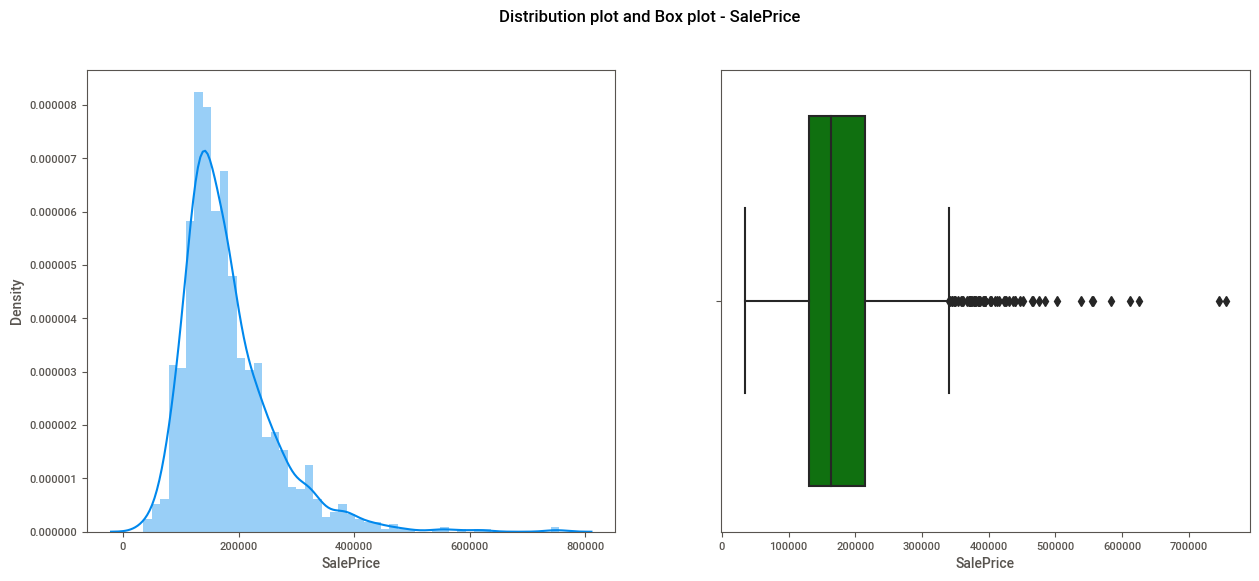

In [65]:
def plot_saleprice():
    plt.figure(figsize=(15,6))
    plt.suptitle('Distribution plot and Box plot - SalePrice')
    plt.subplot(121)
    sns.distplot(data['SalePrice'])
    plt.subplot(122)
    sns.boxplot(data['SalePrice'],color='g')
    
    
plot_saleprice()

- As already observed there is a right skew-ness in the target variable. 
- Lets try to bring it close to normal distribution.For right skew-ness, common method used is log transformation.

In [66]:
data['SalePrice']=np.log(data['SalePrice'])

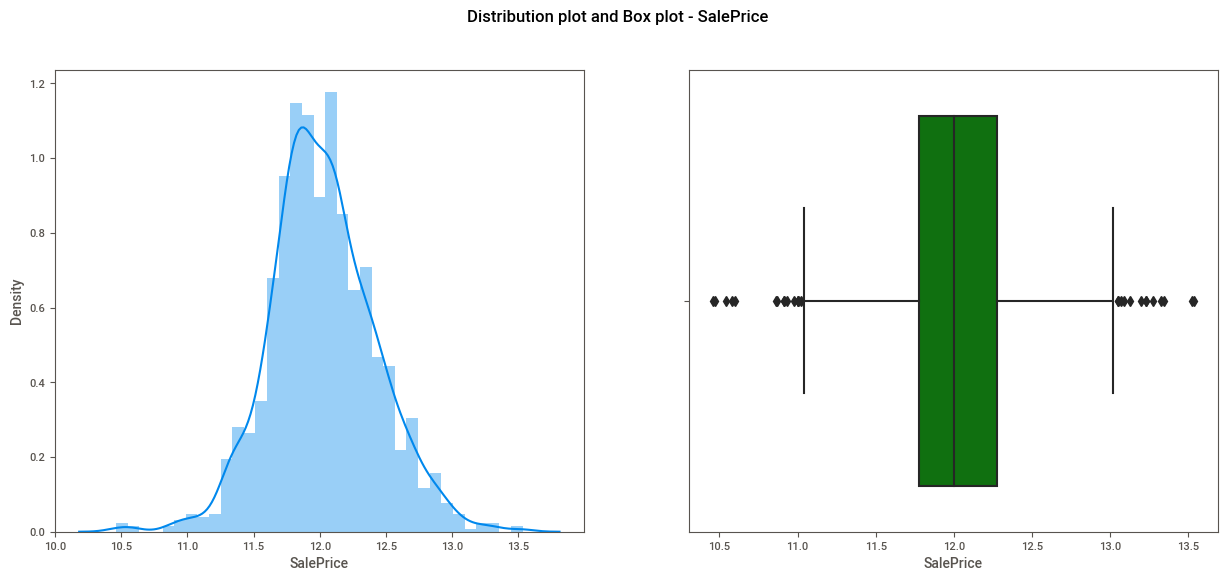

In [67]:
plot_saleprice()

Now 'SalePrice' is close to normal distribution

## Model Building

In [68]:
x_data = data.loc[:,data.columns != 'SalePrice']

In [69]:
x_cols = x_data.columns.to_list()

In [70]:
X_train,X_test,y_train,y_test = train_test_split(data[x_cols], data['SalePrice'], train_size=0.8,test_size=0.2, random_state=100)

In [71]:
X_train.shape

(1168, 239)

In [72]:
y_train.shape

(1168,)

In [73]:
X_test.shape

(292, 239)

In [74]:
y_test.shape

(292,)

In [75]:
x_num_cols =x_data.select_dtypes(['int64','float64']).columns.to_list()

### Scaling of num_col using min_max scaler

In [76]:
scaler = MinMaxScaler()
X_train[x_num_cols] = scaler.fit_transform(X_train[x_num_cols])

In [77]:
X_train[x_num_cols]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
133,0.167979,0.025955,0.777778,0.500,0.934783,0.866667,0.08500,0.666667,0.333333,1.0,0.75,0.25,0.178065,0.000000,0.112158,0.207365,1.00,0.213889,0.000000,0.0,0.164873,0.333333,0.0,0.666667,0.0,0.250,0.0,0.666667,0.272727,0.000000,0.0,0.995522,0.50,0.332158,0.6,0.6,0.224037,0.047801,0.000000,0.0,0.0,0.0,0.0,0.0,0.454545,0.75
290,0.339041,0.066891,0.777778,0.500,0.971014,0.933333,0.00000,0.666667,0.333333,0.8,0.75,0.75,0.000000,0.000000,0.461901,0.176596,1.00,0.163657,0.406780,0.0,0.284589,0.000000,0.0,0.666667,0.5,0.375,0.0,0.666667,0.454545,0.333333,0.8,0.998010,0.50,0.483075,0.8,0.6,0.000000,0.097514,0.000000,0.0,0.0,0.0,0.0,0.0,0.545455,0.00
24,0.167979,0.032466,0.444444,0.875,0.695652,0.850000,0.00000,0.333333,0.666667,0.6,0.75,0.50,0.033310,0.453189,0.087329,0.173486,1.00,0.159259,0.000000,0.0,0.119523,0.333333,0.0,0.333333,0.0,0.375,0.0,0.666667,0.272727,0.333333,0.6,0.979104,0.25,0.190409,0.6,0.6,0.473746,0.172084,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,1.00
1093,0.171233,0.037066,0.444444,0.875,0.673913,0.800000,0.10375,0.333333,0.333333,0.6,0.75,0.50,0.117116,0.000000,0.086901,0.141408,0.75,0.191667,0.000000,0.0,0.146426,0.333333,0.0,0.333333,0.5,0.125,0.0,0.666667,0.272727,0.000000,0.0,0.983582,0.50,0.623413,0.6,0.6,0.000000,0.122371,0.000000,0.0,0.0,0.0,0.0,0.0,0.818182,0.00
1288,0.065068,0.020398,0.777778,0.500,0.927536,0.833333,0.00000,0.666667,0.333333,0.8,0.75,0.25,0.205174,0.000000,0.146832,0.245663,1.00,0.297917,0.000000,0.0,0.234627,0.333333,0.0,0.666667,0.0,0.250,0.0,1.000000,0.181818,0.333333,1.0,0.995025,0.50,0.351904,0.6,0.6,0.247375,0.112811,0.000000,0.0,0.0,0.0,0.0,0.0,0.818182,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.143836,0.032247,0.666667,0.500,0.963768,0.916667,0.00000,0.666667,0.333333,0.8,0.75,0.75,0.114812,0.000000,0.034247,0.119149,1.00,0.082407,0.352542,0.0,0.195619,0.333333,0.0,0.666667,0.5,0.375,0.0,0.666667,0.363636,0.333333,0.8,0.997512,0.50,0.289140,0.6,0.6,0.042007,0.034417,0.000000,0.0,0.0,0.0,0.0,0.0,0.818182,0.50
53,0.160959,0.228895,0.888889,0.500,0.789855,0.616667,0.00000,0.666667,0.333333,1.0,0.75,1.00,0.320695,0.000000,0.013699,0.301473,0.75,0.340278,0.000000,0.0,0.269792,0.666667,0.0,0.000000,0.5,0.000,0.0,0.666667,0.181818,0.333333,0.8,0.985572,0.75,0.630465,0.6,0.6,1.000000,0.137667,0.000000,0.0,0.0,0.0,0.0,0.0,0.909091,0.00
350,0.160959,0.030475,0.888889,0.500,0.978261,0.950000,0.22625,1.000000,0.333333,1.0,0.75,0.25,0.000000,0.000000,0.800086,0.305892,1.00,0.346528,0.000000,0.0,0.274981,0.000000,0.0,0.666667,0.0,0.250,0.0,1.000000,0.272727,0.333333,0.8,0.998507,0.50,0.435120,0.6,0.6,0.245041,0.103250,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.25
79,0.133562,0.042721,0.444444,0.625,0.275362,0.516667,0.00000,0.333333,0.333333,0.6,0.75,0.25,0.000000,0.000000,0.188356,0.072013,0.75,0.071759,0.265375,0.0,0.152191,0.000000,0.0,0.333333,0.5,0.250,0.0,0.333333,0.181818,0.000000,0.0,0.978109,0.50,0.310296,0.6,0.6,0.086348,0.000000,0.231884,0.0,0.0,0.0,0.0,0.0,0.363636,0.75


### Linear Regression-Unregularized using all the columns

In [78]:
lr = LinearRegression()
reg = lr.fit(X_train,y_train)

In [79]:
reg.coef_

array([ 1.04641150e-01,  5.63941144e-01,  3.00546762e-01,  3.02646676e-01,
        3.05668135e-01,  5.10803559e-02,  7.01438867e-02, -2.21070324e-02,
       -7.36901101e-02,  5.46056061e-02,  1.34845527e-03,  4.11506326e-02,
        4.32137699e+12,  1.12858074e+12,  1.78857843e+12, -4.67817388e+12,
        3.78238111e-02,  3.42084228e+11,  1.63519428e+11,  4.07808743e+10,
       -4.12084796e+11,  7.28527975e-02,  3.98403243e-03,  6.55196854e-02,
        4.51413854e-02,  6.09423813e-03, -5.55503305e-02,  5.03867093e-02,
        2.74653421e-02,  1.54813122e-02,  3.54770051e-02, -7.96921745e-01,
        1.13219557e-01,  1.39665452e-01,  1.74261348e-01,  1.54128852e-02,
        5.67645319e-02,  3.87299780e-02,  6.02150923e-02,  1.04918889e-01,
        6.72380416e-02,  1.30541933e-01, -1.07415371e-02, -1.01137300e-01,
        3.33733233e-03, -1.20582352e-02, -7.33164049e-02, -1.26588720e-01,
       -2.62304691e-01,  2.28545711e-02, -2.92410991e-02,  1.92352005e-02,
       -1.33344259e-01, -

In [80]:
y_train_pred = reg.predict(X_train)

In [81]:
r2_score(y_train,y_train_pred)

0.9493272813577013

In [82]:
# error terms
residuals = y_train - y_train_pred

Text(0.5, 1.0, 'prediction vs residuals')

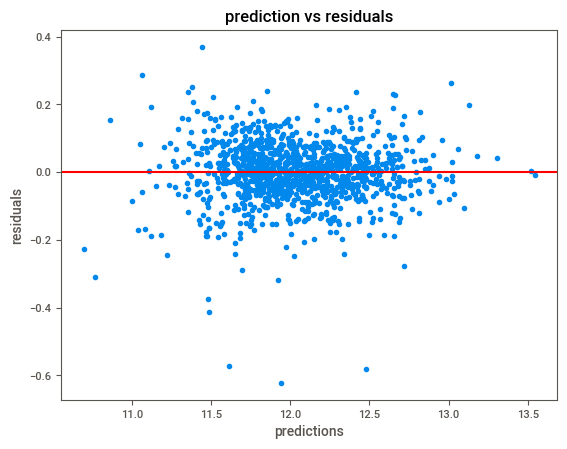

In [83]:
plt.scatter(x=y_train_pred,y=residuals)
plt.axhline(y=0,color = 'r')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.title('prediction vs residuals')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

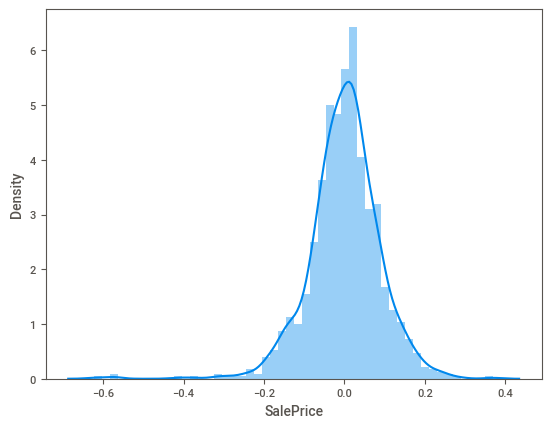

In [84]:
sns.distplot(residuals)

In [85]:
# Perform scaler transform before prediction
X_test[x_num_cols] = scaler.transform(X_test[x_num_cols])

In [86]:
y_test_pred = reg.predict(X_test)

In [87]:
linear_unreg = []

linear_unreg.append(r2_score(y_train,y_train_pred))
linear_unreg.append(r2_score(y_test,y_test_pred))
linear_unreg.append(np.sum(np.square(y_train - y_train_pred)))
linear_unreg.append(np.sum(np.square(y_test - y_test_pred)))
linear_unreg.append(mean_squared_error(y_train, y_train_pred))
linear_unreg.append(mean_squared_error(y_test, y_test_pred))



print(f' r2 score for train: {r2_score(y_train,y_train_pred)}')
print(f' rss for train: {np.sum(np.square(y_train - y_train_pred))}')
print(f' mse for train: {mean_squared_error(y_train, y_train_pred)}')
print('\n')

print(f' r2 score for test: {r2_score(y_test,y_test_pred)}')
print(f' rss for test: {np.sum(np.square(y_test - y_test_pred))}')
print(f' mse for test: {mean_squared_error(y_test, y_test_pred)}')

 r2 score for train: 0.9493272813577013
 rss for train: 9.249141499340045
 mse for train: 0.007918785530256888


 r2 score for test: -1.9453865562615494e+23
 rss for test: 9.779682349196155e+24
 mse for test: 3.349206283971286e+22


### Top-10 features from Unregularized Model influencing the 'SalePrice'

In [88]:
unreg_coeff = pd.DataFrame({'Features': data[x_cols].columns,'unreg_coeff' : reg.coef_})
unreg_coeff.sort_values('unreg_coeff',ascending=False).head(10)

,Features,unreg_coeff
12,BsmtFinSF1,4.321377e+12
182,BsmtFinType1_NA,2.790000e+12
238,SaleCondition_Partial,1.804481e+12
14,BsmtUnfSF,1.788578e+12
55,MSSubClass_90,1.260693e+12
13,BsmtFinSF2,1.128581e+12
17,1stFlrSF,3.420842e+11
159,Exterior2nd_CBlock,3.075447e+11
18,2ndFlrSF,1.635194e+11
142,Exterior1st_AsphShn,7.493719e+10


## Using regularizaiton using Ridge

In [89]:
ridge= Ridge()

params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#Cross validation
model_cv_ridge = GridSearchCV(estimator=ridge,param_grid=params,scoring='r2',cv=5,return_train_score=True,verbose=1)
model_cv_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

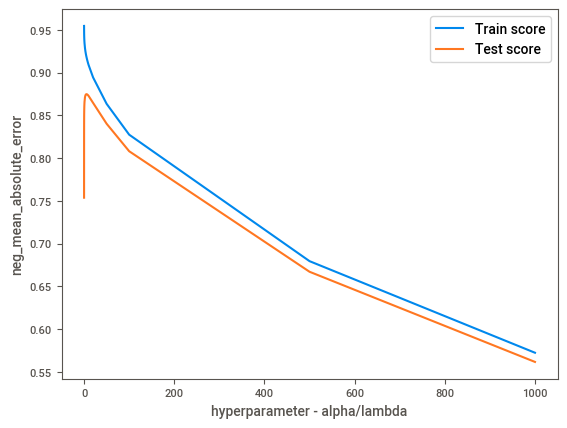

In [90]:
ridge_result = pd.DataFrame(model_cv_ridge.cv_results_)
ridge_result['param_alpha'] = ridge_result.param_alpha.astype('float64')

plt.plot(ridge_result.param_alpha,ridge_result.mean_train_score)
plt.plot(ridge_result.param_alpha,ridge_result.mean_test_score)
plt.xlabel('hyperparameter - alpha/lambda')
plt.ylabel('neg_mean_absolute_error')
plt.legend(['Train score','Test score'])

In [91]:
alpha = model_cv_ridge.best_params_['alpha']
print(alpha)

5.0


In [92]:
ridge = Ridge(alpha = alpha)

In [93]:
reg_ridge = ridge.fit(X_train,y_train)

In [94]:
reg_ridge.coef_

array([-8.58822132e-03,  8.56723903e-02,  2.97412303e-01,  1.90709096e-01,
        7.18532857e-02,  6.48075879e-02,  4.02327835e-02,  5.87220577e-02,
       -7.71332623e-03,  1.09172476e-01,  4.01862556e-02,  7.40527105e-02,
        7.34200030e-02,  4.77674465e-02,  4.66471653e-02,  9.71783128e-02,
        4.37145174e-02,  2.11746300e-01,  1.62553723e-01,  8.67360364e-03,
        2.41138424e-01,  1.21333004e-01,  7.01909885e-06,  1.55382600e-01,
        7.98793611e-02,  5.94704193e-02, -4.86598694e-02,  8.34593168e-02,
        1.79420433e-01,  5.01250176e-02,  7.32551386e-02, -6.83026367e-03,
        1.47036782e-01,  1.11783085e-01,  4.57346615e-02,  9.79275113e-03,
        7.14304626e-02,  3.16267544e-02,  4.45117765e-02,  6.39824817e-02,
        5.01873999e-02, -3.76679009e-02, -4.01370720e-02, -3.09364905e-04,
       -5.24136877e-03, -2.31575401e-02, -9.14256420e-02, -1.28507037e-02,
       -2.02945068e-02,  2.29962878e-02, -2.76936613e-02,  4.91367643e-02,
        3.81501324e-02,  

In [95]:
y_train_pred_ridge = reg_ridge.predict(X_train)

In [96]:
residual_ridge = y_train - y_train_pred_ridge

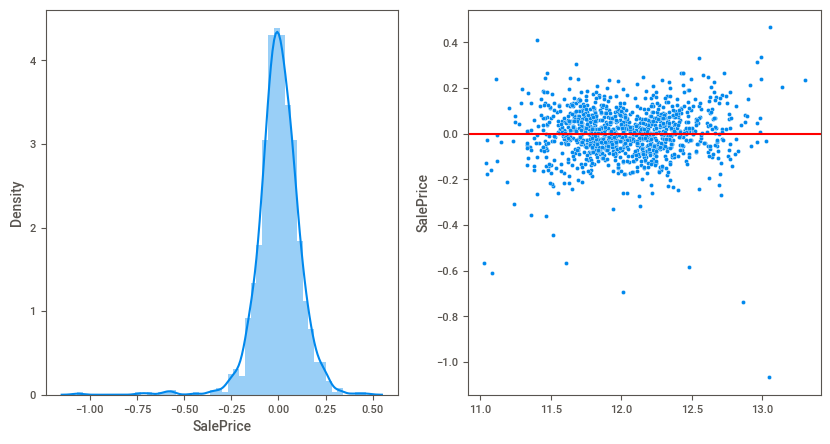

In [97]:
## Distribution of error terms
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(residual_ridge)

plt.subplot(1,2,2)
## Chect Homoscedacity
sns.scatterplot(x=y_train_pred_ridge, y=residual_ridge)
plt.axhline(y=0,color = 'r')

In [98]:
y_test_pred_ridge = reg_ridge.predict(X_test)

In [99]:
linear_ridge = []

linear_ridge.append(r2_score(y_train,y_train_pred_ridge))
linear_ridge.append(r2_score(y_test,y_test_pred_ridge))
linear_ridge.append(np.sum(np.square(y_train - y_train_pred_ridge)))
linear_ridge.append(np.sum(np.square(y_test - y_test_pred_ridge)))
linear_ridge.append(mean_squared_error(y_train, y_train_pred_ridge))
linear_ridge.append(mean_squared_error(y_test, y_test_pred_ridge))



print(f' r2 score for train: {r2_score(y_train,y_train_pred_ridge)}')
print(f' rss for train: {np.sum(np.square(y_train - y_train_pred_ridge))}')
print(f' mse for train: {mean_squared_error(y_train, y_train_pred_ridge)}')
print('\n')

print(f' r2 score for test: {r2_score(y_test,y_test_pred_ridge)}')
print(f' rss for test: {np.sum(np.square(y_test - y_test_pred_ridge))}')
print(f' mse for test: {mean_squared_error(y_test, y_test_pred_ridge)}')

 r2 score for train: 0.9167961378356991
 rss for train: 15.186954934895002
 mse for train: 0.013002529910012845


 r2 score for test: 0.8936869782815525
 rss for test: 5.3444780865948545
 mse for test: 0.01830300714587279


### Top-10 features from Ridge Model influencing the 'SalePrice'

In [100]:
ridge_coeff = pd.DataFrame({'Features': data[x_cols].columns,'ridge_coeff' : reg_ridge.coef_})
ridge_coeff.sort_values('ridge_coeff',ascending=False).head(10)

,Features,ridge_coeff
2,OverallQual,0.297412
20,GrLivArea,0.241138
17,1stFlrSF,0.211746
3,OverallCond,0.190709
28,TotRmsAbvGrd,0.179420
18,2ndFlrSF,0.162554
23,FullBath,0.155383
32,GarageCars,0.147037
21,BsmtFullBath,0.121333
101,Neighborhood_StoneBr,0.120931


## Using regularizaiton using Lasso Model

In [101]:
lasso = Lasso()
params = {'alpha': [0.00001,0.00005,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model_cv_lasso = GridSearchCV(lasso,param_grid=params,cv=5,scoring='neg_mean_absolute_error',verbose=1,return_train_score=True)

model_cv_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
lasso_result = pd.DataFrame(model_cv_lasso.cv_results_)

In [103]:
lasso_result = pd.DataFrame(model_cv_lasso.cv_results_)
lasso_result['param_alpha'] = lasso_result.param_alpha.astype('float64')

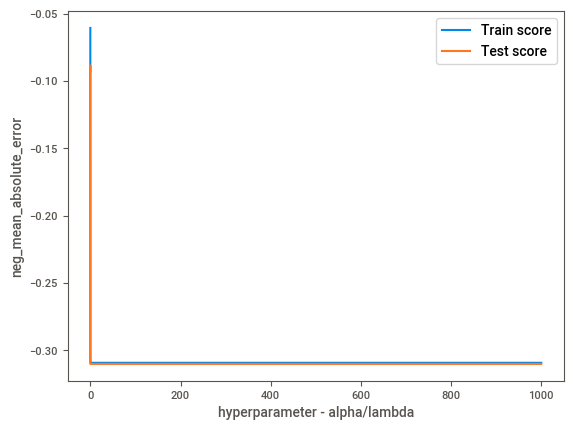

In [104]:
plt.plot(lasso_result.param_alpha,lasso_result.mean_train_score)
plt.plot(lasso_result.param_alpha,lasso_result.mean_test_score)
plt.xlabel('hyperparameter - alpha/lambda')
plt.ylabel('neg_mean_absolute_error')
plt.legend(['Train score','Test score'])

In [105]:
alpha = model_cv_lasso.best_params_['alpha']
print(alpha)

0.0001


In [106]:
lasso = Lasso(alpha=alpha)

reg_lasso = lasso.fit(X_train,y_train)

In [107]:
reg_lasso.coef_

array([-0.00000000e+00,  3.03695498e-01,  3.80802533e-01,  2.87951959e-01,
        2.01211335e-01,  4.36085423e-02,  2.03233899e-02,  1.13166666e-02,
       -1.86448977e-02,  1.03712250e-01,  2.70176648e-02,  6.25078244e-02,
        1.27335098e-01,  4.99394789e-02, -0.00000000e+00,  9.97315307e-02,
        3.97951578e-02,  3.63033550e-02,  0.00000000e+00, -4.73427942e-03,
        1.25051306e+00,  1.23823305e-01,  1.53848793e-03,  8.80969218e-02,
        5.06972599e-02,  0.00000000e+00, -7.93796790e-02,  4.69929244e-02,
        6.99595075e-02,  1.38101526e-02,  5.97150977e-02, -1.63121591e-02,
        1.83707859e-01,  3.84542241e-02,  3.40915216e-02, -0.00000000e+00,
        5.29630520e-02,  4.71471350e-02,  6.55672724e-02,  9.55164060e-02,
        5.70465028e-02, -0.00000000e+00, -1.88496220e-01, -0.00000000e+00,
       -2.89889855e-03, -1.75571677e-02, -7.51935285e-02, -2.02528893e-02,
       -0.00000000e+00,  9.85971753e-03, -4.46140075e-02,  1.53552741e-02,
        0.00000000e+00,  

In [108]:
y_train_pred_lasso = reg_lasso.predict(X_train)

In [109]:
residual_lasso = y_train - y_train_pred_lasso

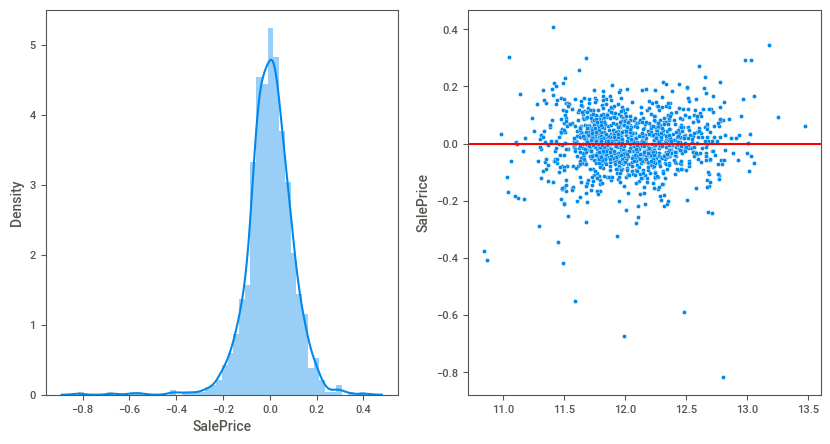

In [110]:
## Distribution of error terms
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(residual_lasso)

plt.subplot(1,2,2)
## Chect Homoscedacity
sns.scatterplot(x=y_train_pred_lasso, y=residual_lasso)
plt.axhline(y=0,color = 'r')

In [111]:
y_test_pred_lasso = reg_lasso.predict(X_test)

In [112]:
linear_lasso = []

linear_lasso.append(r2_score(y_train,y_train_pred_lasso))
linear_lasso.append(r2_score(y_test,y_test_pred_lasso))
linear_lasso.append(np.sum(np.square(y_train - y_train_pred_lasso)))
linear_lasso.append(np.sum(np.square(y_test - y_test_pred_lasso)))
linear_lasso.append(mean_squared_error(y_train, y_train_pred_lasso))
linear_lasso.append(mean_squared_error(y_test, y_test_pred_lasso))



print(f' r2 score for train: {r2_score(y_train,y_train_pred_lasso)}')
print(f' rss for train: {np.sum(np.square(y_train - y_train_pred_lasso))}')
print(f' mse for train: {mean_squared_error(y_train, y_train_pred_lasso)}')
print('\n')

print(f' r2 score for test: {r2_score(y_test,y_test_pred_lasso)}')
print(f' rss for test: {np.sum(np.square(y_test - y_test_pred_lasso))}')
print(f' mse for test: {mean_squared_error(y_test, y_test_pred_lasso)}')

 r2 score for train: 0.9381139842714129
 rss for train: 11.29587145984082
 mse for train: 0.009671122825206182


 r2 score for test: 0.8776877813431351
 rss for test: 6.1487761496010975
 mse for test: 0.021057452567127048


### Top-10 features from Lasso Model influencing the 'SalePrice'

In [113]:
lasso_coeff = pd.DataFrame({'Features': data[x_cols].columns,'lasso_coeff' : reg_lasso.coef_})
lasso_coeff.sort_values('lasso_coeff',ascending=False).head(10)

,Features,lasso_coeff
20,GrLivArea,1.250513
141,RoofMatl_WdShngl,0.830497
135,RoofMatl_CompShg,0.758039
139,RoofMatl_Tar&Grv,0.707657
136,RoofMatl_Membran,0.686333
140,RoofMatl_WdShake,0.641092
138,RoofMatl_Roll,0.599780
137,RoofMatl_Metal,0.573273
2,OverallQual,0.380803
60,MSZoning_FV,0.375005


## Compare linear regression without regularization and other regularized methods: Ridge and Lasso

- Compare metrics
- Compare co-efficients

##### Compare metrics

In [114]:
df_compare_metrics = pd.DataFrame({'Metrics':['r2_score_train','r2_score_test','rss_train','rss_test','mse_train','mse_test'],
                                   'Linear_Unregularized':linear_unreg,
                                   'Linear_reg_Ridge': linear_ridge,
                                   'Linear_reg_Lasso': linear_lasso})

In [115]:
df_compare_metrics

,Metrics,Linear_Unregularized,Linear_reg_Ridge,Linear_reg_Lasso
0,r2_score_train,9.493273e-01,0.916796,0.938114
1,r2_score_test,-1.945387e+23,0.893687,0.877688
2,rss_train,9.249141e+00,15.186955,11.295871
3,rss_test,9.779682e+24,5.344478,6.148776
4,mse_train,7.918786e-03,0.013003,0.009671
5,mse_test,3.349206e+22,0.018303,0.021057


### Conclusion:
- Ridge regression gives better prediction with 0.893 r2 score compared to Lasso regression 0.877 with r2_score values.
- rss_test:
    - linear regression without regularization = 9.779682e+24;
    - Ridge regression = 5.344478
    - Lasso regression = 6.148776

- mse_test:
    - linear regression without regularization = 3.349206e+22
    - Ridge regression = 0.018303
    - Lasso regression = 0.021057
- Here I would go with Ridge regression over Lasso regression as for housing domain, mostly all the features contribute to the
SalePrice. And If company want to understand the key features, it is possible to identify with the co-efficients.

#### Compare co-efficients

In [116]:
df_compare_coeff =  pd.DataFrame({'Features': data[x_cols].columns,
                                  'Linear_Unregularized': reg.coef_,
                                  'Linear_Ridge': reg_ridge.coef_,
                                  'Linear_Lasso': reg_lasso.coef_})

In [117]:
df_compare_coeff.head(10)

,Features,Linear_Unregularized,Linear_Ridge,Linear_Lasso
0,LotFrontage,0.104641,-0.008588,-0.000000
1,LotArea,0.563941,0.085672,0.303695
2,OverallQual,0.300547,0.297412,0.380803
3,OverallCond,0.302647,0.190709,0.287952
4,YearBuilt,0.305668,0.071853,0.201211
5,YearRemodAdd,0.051080,0.064808,0.043609
6,MasVnrArea,0.070144,0.040233,0.020323
7,ExterQual,-0.022107,0.058722,0.011317
8,ExterCond,-0.073690,-0.007713,-0.018645
9,BsmtQual,0.054606,0.109172,0.103712


### Subjective questions - 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Ridge regression with double the alpha

In [118]:
ridge_sub = Ridge(alpha = 10)
reg_ridge_sub = ridge_sub.fit(X_train,y_train)
y_train_ridge_sub  = reg_ridge_sub.predict(X_train)
r2_score(y_train,y_train_ridge_sub)

0.9082730749805235

In [119]:
ridge_coeff_sub = pd.DataFrame({'Feature':X_train.columns,'ridge_coeff':reg_ridge_sub.coef_})
ridge_coeff_sub.sort_values('ridge_coeff',ascending=False).nlargest(10,columns='ridge_coeff')

,Feature,ridge_coeff
2,OverallQual,0.248857
20,GrLivArea,0.190164
28,TotRmsAbvGrd,0.168814
17,1stFlrSF,0.163394
3,OverallCond,0.150817
23,FullBath,0.148879
18,2ndFlrSF,0.135991
32,GarageCars,0.134366
33,GarageArea,0.113490
21,BsmtFullBath,0.103917


#### Lasso regression with double the alpha

In [120]:
lasso_sub = Lasso(alpha = 0.002)
reg_lasso_sub = lasso_sub.fit(X_train,y_train)
y_train_lasso_sub  = reg_lasso_sub.predict(X_train)
r2_score(y_train,y_train_lasso_sub)

0.8815868740819538

In [121]:
lasso_coeff_sub = pd.DataFrame({'Feature':X_train.columns,'lasso_coeff':reg_lasso_sub.coef_})
lasso_coeff_sub.sort_values('lasso_coeff',ascending=False).nlargest(10,columns='lasso_coeff')

,Feature,lasso_coeff
20,GrLivArea,0.692861
2,OverallQual,0.538423
32,GarageCars,0.226418
28,TotRmsAbvGrd,0.137555
9,BsmtQual,0.132846
3,OverallCond,0.121179
30,FireplaceQu,0.113192
27,KitchenQual,0.097741
21,BsmtFullBath,0.087393
23,FullBath,0.085197


### Subjective questions - 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

##### Ridge regression  - subjective question

In [122]:
# top 5 feature from ridge regression
top_ridge_coeff = ridge_coeff.sort_values('ridge_coeff',ascending=False)['Features'].head(5)

In [123]:
# drop 5 columns from X_train and X_test
X_train_ridge_sub = X_train.drop(top_ridge_coeff,axis = 1)
X_test_sub = X_test.drop(top_ridge_coeff,axis = 1)

In [124]:
# Ridge regression
alpha = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

model_cv_ridge_sub = GridSearchCV(estimator=ridge,param_grid=alpha,scoring='neg_mean_absolute_error',cv=5,verbose=1,return_train_score=True)
model_cv_ridge_sub.fit(X_train_ridge_sub,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [125]:
ridge_result_sub = pd.DataFrame(model_cv_ridge_sub.cv_results_)

ridge_result_sub = pd.DataFrame(model_cv_ridge_sub.cv_results_)
ridge_result_sub['param_alpha'] = ridge_result_sub.param_alpha.astype('float64')

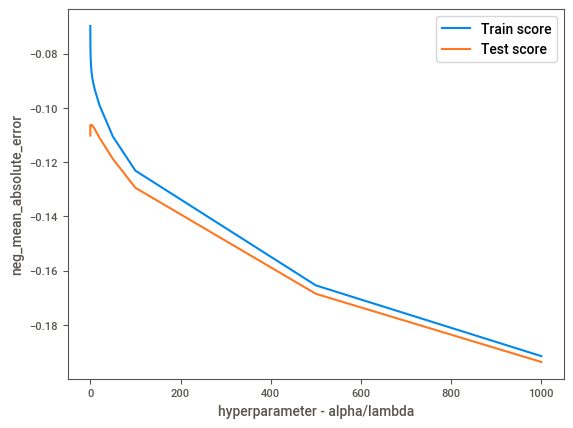

In [126]:
plt.plot(ridge_result_sub.param_alpha,ridge_result_sub.mean_train_score)
plt.plot(ridge_result_sub.param_alpha,ridge_result_sub.mean_test_score)
plt.xlabel('hyperparameter - alpha/lambda')
plt.ylabel('neg_mean_absolute_error')
plt.legend(['Train score','Test score'])

In [127]:
alpha = model_cv_ridge_sub.best_params_['alpha']
print(alpha)

2.0


In [128]:
ridge = Ridge(alpha = alpha)
reg_ridge_sub = ridge.fit(X_train_ridge_sub,y_train)

In [129]:
df_ridge_coeff_sub = pd.DataFrame({'Features':X_train_ridge_sub.columns , 'coeff': reg_ridge_sub.coef_})

In [130]:
# New top 5 features
df_ridge_coeff_sub.sort_values(by='coeff',ascending=False).head(5)

,Features,coeff
15,2ndFlrSF,0.328699
13,TotalBsmtSF,0.283301
10,BsmtFinSF1,0.230860
19,FullBath,0.222683
136,RoofMatl_WdShngl,0.194108


In [131]:
y_train_pred_ridge_sub = reg_ridge_sub.predict(X_train_ridge_sub)

In [132]:
r2_score(y_train,y_train_pred_ridge_sub)

0.9089351238420278

##### Lasso regression - subjective question

In [133]:
# top 5 feature from Lasso regression
top_lasso_coeff = lasso_coeff.sort_values('lasso_coeff',ascending=False)['Features'].head(5)

In [134]:
# drop 5 columns from X_train and X_test
X_train_lasso_sub = X_train.drop(top_lasso_coeff,axis = 1)
X_test_lasso_sub = X_test.drop(top_lasso_coeff,axis = 1)

In [135]:
# Lasso regression
alpha = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

model_cv_lasso_sub = GridSearchCV(estimator=lasso,param_grid=alpha,scoring='neg_mean_absolute_error',cv=5,verbose=1,return_train_score=True)
model_cv_lasso_sub.fit(X_train_lasso_sub,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [136]:
lasso_result_sub = pd.DataFrame(model_cv_lasso_sub.cv_results_)

lasso_result_sub = pd.DataFrame(model_cv_lasso_sub.cv_results_)
lasso_result_sub['param_alpha'] = lasso_result_sub.param_alpha.astype('float64')

In [137]:
alpha = model_cv_lasso_sub.best_params_['alpha']
print(alpha)

0.0001


In [138]:
lasso = Lasso(alpha = alpha)
reg_lasso_sub = ridge.fit(X_train_lasso_sub,y_train)

In [139]:
df_lasso_coeff_sub = pd.DataFrame({'Features':X_train_lasso_sub.columns , 'coeff': reg_lasso_sub.coef_})

In [140]:
# New top 5 features
df_lasso_coeff_sub.sort_values(by='coeff',ascending=False).head(5)

,Features,coeff
17,1stFlrSF,0.391060
2,OverallQual,0.355067
18,2ndFlrSF,0.272846
3,OverallCond,0.227099
27,TotRmsAbvGrd,0.202816


In [141]:
y_train_pred_lasso_sub = reg_lasso_sub.predict(X_train_lasso_sub)

In [142]:
r2_score(y_train,y_train_pred_lasso_sub)

0.9224846357818831